In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [3]:
df=pd.read_csv("Rainfall.csv")
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df.shape

(366, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [8]:
# Removing extra spaces
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [10]:
df.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [11]:
# Removing the redundant info
df=df.drop(columns=['day'])
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [12]:
# Checking the missing values
print(df.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [16]:
df[["winddirection"]]

,winddirection
0,80.0
1,50.0
2,40.0
3,50.0
4,40.0
...,...
361,30.0
362,20.0
363,70.0
364,20.0


In [18]:
df.winddirection.unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [19]:
df.windspeed.unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [20]:
# Empty space filled with mode and median values
df['winddirection']=df['winddirection'].fillna(df.winddirection.mode()[0])
df['windspeed']=df['windspeed'].fillna(df.windspeed.median())

In [21]:
# There are no null values
print(df.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [22]:
df.rainfall.unique()

array(['yes', 'no'], dtype=object)

In [23]:
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [25]:
rainfall=pd.get_dummies(df['rainfall'],drop_first=True)
rainfall

,yes
0,True
1,True
2,True
3,True
4,True
...,...
361,True
362,True
363,True
364,True


In [26]:
df=pd.concat([df,rainfall],axis=1)
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,yes
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,True
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,True
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,True
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,True
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,True
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4,True
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9,True
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4,True
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9,True


In [27]:
df['yes']=df['yes'].astype("int")
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,yes
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4,1
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9,1
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4,1
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9,1


In [28]:
df=df.drop(columns=['rainfall'])
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,yes
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1


In [29]:
df.rename(columns={'yes':'rainfall'},inplace=True) # inplace=True means applies the changes
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,1
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,1
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,1
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,1
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,1
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,0.0,30.0,18.4,1
362,1026.6,18.6,17.3,16.3,12.8,75,85,1.0,20.0,25.9,1
363,1025.9,18.9,17.7,16.4,13.3,75,78,4.6,70.0,33.4,1
364,1025.3,19.2,17.3,15.2,13.3,78,86,1.2,20.0,20.9,1


Exploratory Data Analysis

In [30]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.284153,21.534153,0.680328
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.722827,10.056054,0.466988
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000,0.000000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.725000,0.000000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000,1.000000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000,1.000000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000,1.000000


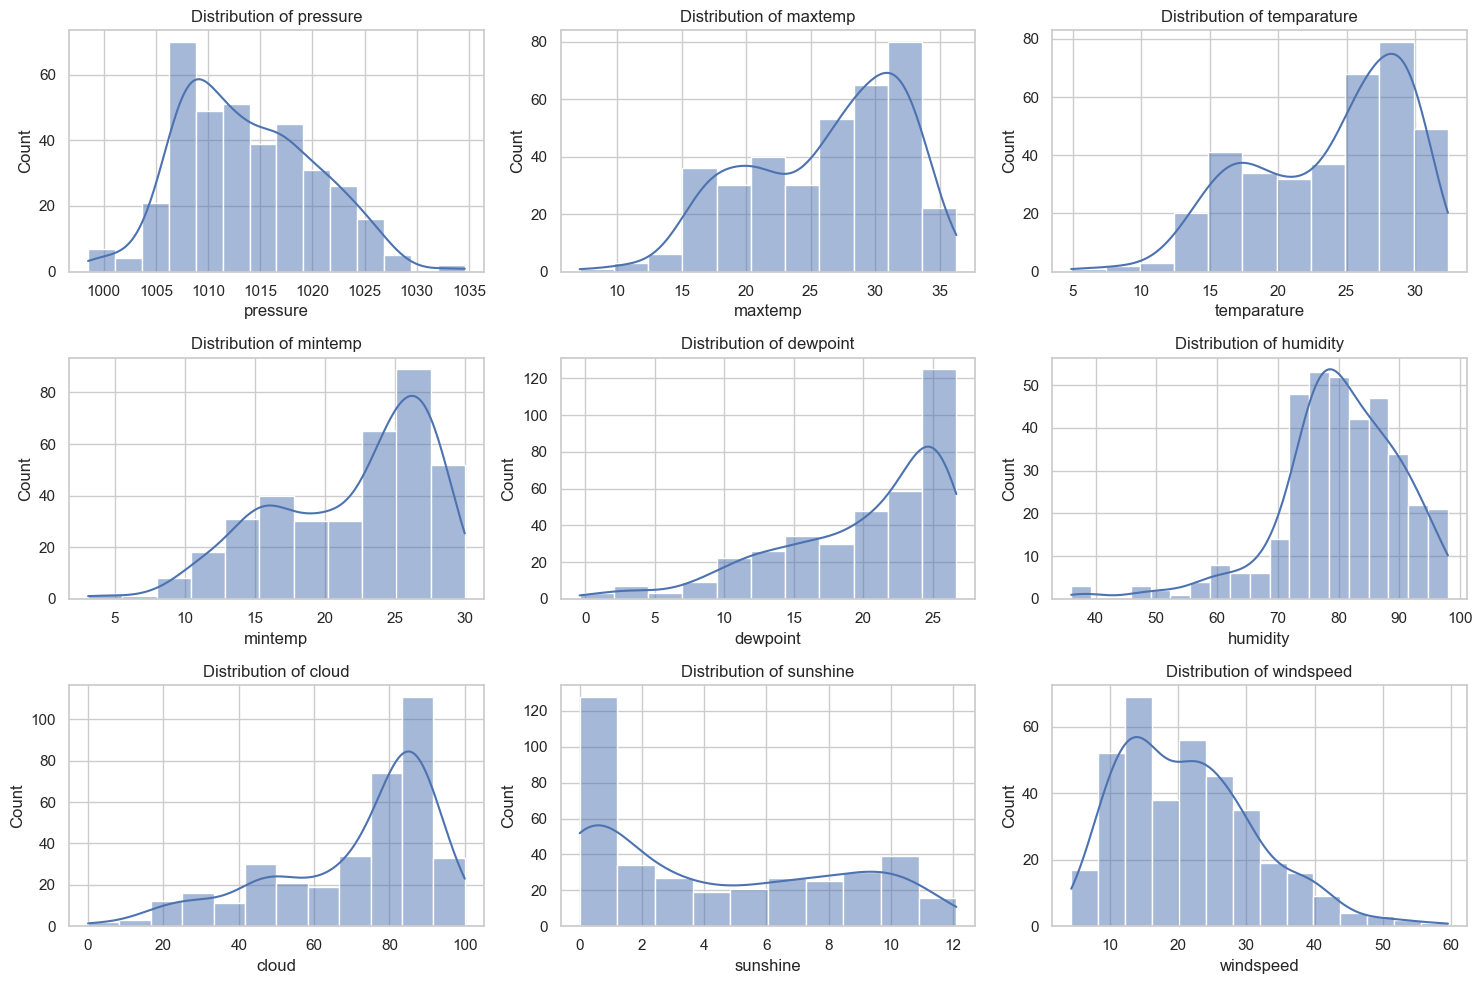

In [34]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

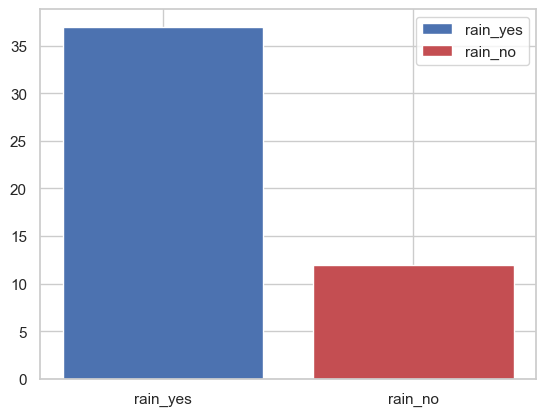

In [37]:
# Bar plot
rain_yes=len(df[df['rainfall']==1])
rain_no=len(df[df['rainfall']==0])
plt.bar(['rain_yes','rain_no'],[rain_yes,rain_no],color=['b','r'],label=['rain_yes','rain_no'])
plt.legend()
plt.show()

In [38]:
df.corr()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
pressure,1.000000,-0.679042,-0.673312,-0.680222,-0.707085,-0.283899,-0.009827,-0.136730,-0.605031,0.339984,0.050064
maxtemp,-0.679042,1.000000,0.785928,0.773670,0.752737,0.012260,-0.307264,0.362230,0.566367,-0.380873,-0.092541
temparature,-0.673312,0.785928,1.000000,0.761427,0.739298,0.103301,-0.173205,0.268737,0.564698,-0.322619,-0.077579
mintemp,-0.680222,0.773670,0.761427,1.000000,0.762673,0.139956,-0.157741,0.261587,0.562799,-0.326221,-0.041605
dewpoint,-0.707085,0.752737,0.739298,0.762673,1.000000,0.374113,0.033205,0.096440,0.568202,-0.315490,-0.059951
humidity,-0.283899,0.012260,0.103301,0.139956,0.374113,1.000000,0.612886,-0.451630,0.122654,-0.114107,-0.006274
cloud,-0.009827,-0.307264,-0.173205,-0.157741,0.033205,0.612886,1.000000,-0.683346,-0.078971,0.232070,0.048417
sunshine,-0.136730,0.362230,0.268737,0.261587,0.096440,-0.451630,-0.683346,1.000000,0.187883,-0.171045,-0.034797
winddirection,-0.605031,0.566367,0.564698,0.562799,0.568202,0.122654,-0.078971,0.187883,1.000000,-0.203460,0.025203
windspeed,0.339984,-0.380873,-0.322619,-0.326221,-0.315490,-0.114107,0.232070,-0.171045,-0.203460,1.000000,0.108239


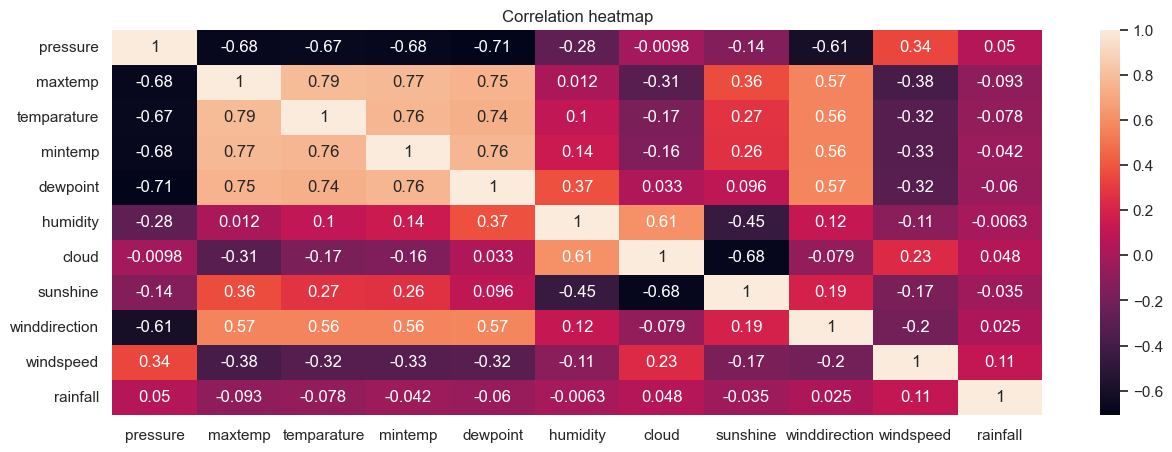

In [40]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation heatmap")
plt.show()